In [1]:
import numpy as np
import pandas as pd


In [2]:
df=pd.read_csv("/content/gpt_dataset.csv")

In [3]:
z1=df['Category'].unique()

In [4]:
df['Category'].value_counts()

,count
Category,
Backend Developer,57
Cloud Engineer,56
Frontend Developer,54
Data Scientist,53
Full Stack Developer,47
Python Developer,45
Mobile App Developer (iOS/Android),45
Machine Learning Engineer,43


In [5]:
df.isnull().sum()

,0
Category,0
Resume,0


In [6]:
df.duplicated().sum()

212

In [7]:
print(df)

                 Category                                             Resume
0      Frontend Developer  As a seasoned Frontend Developer, I have a pro...
1       Backend Developer  With a solid background in Backend Development...
2        Python Developer  As a Python Developer, I leverage my expertise...
3          Data Scientist  With a background in Data Science, I possess a...
4      Frontend Developer  Experienced Frontend Developer with a passion ...
..                    ...                                                ...
395        Cloud Engineer  Dynamic Cloud Engineer specializing in archite...
396        Cloud Engineer  Skilled Cloud Engineer with a focus on buildin...
397  Full Stack Developer  Experienced Full Stack Developer with expertis...
398  Full Stack Developer  Innovative Full Stack Developer with a passion...
399  Full Stack Developer  Dynamic Full Stack Developer specializing in b...

[400 rows x 2 columns]


# Lowercasing

In [8]:
df['Resume']=df['Resume'].apply(lambda x:x.lower())

In [9]:
df

,Category,Resume
0,Frontend Developer,"as a seasoned frontend developer, i have a pro..."
1,Backend Developer,with a solid background in backend development...
2,Python Developer,"as a python developer, i leverage my expertise..."
3,Data Scientist,"with a background in data science, i possess a..."
4,Frontend Developer,experienced frontend developer with a passion ...
...,...,...
395,Cloud Engineer,dynamic cloud engineer specializing in archite...
396,Cloud Engineer,skilled cloud engineer with a focus on buildin...
397,Full Stack Developer,experienced full stack developer with expertis...
398,Full Stack Developer,innovative full stack developer with a passion...


# Removing Stopwords

In [12]:
import nltk

# Download the 'stopwords' dataset
nltk.download('stopwords')

from nltk.corpus import stopwords
sw_list = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
from nltk.corpus import stopwords
sw_list=stopwords.words('english')

In [14]:
df['Resume']=df['Resume'].apply(lambda x:[item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))

In [15]:
df

,Category,Resume
0,Frontend Developer,"seasoned frontend developer, proven track reco..."
1,Backend Developer,"solid background backend development, bring 7 ..."
2,Python Developer,"python developer, leverage expertise python pr..."
3,Data Scientist,"background data science, possess unique blend ..."
4,Frontend Developer,experienced frontend developer passion craftin...
...,...,...
395,Cloud Engineer,dynamic cloud engineer specializing architecti...
396,Cloud Engineer,skilled cloud engineer focus building secure s...
397,Full Stack Developer,experienced full stack developer expertise dev...
398,Full Stack Developer,innovative full stack developer passion buildi...


# Removing Numbers

In [16]:
df['Resume']=df['Resume'].apply(lambda x:' '.join([i for i in x.split() if not i.isdigit()]))

In [17]:
df

,Category,Resume
0,Frontend Developer,"seasoned frontend developer, proven track reco..."
1,Backend Developer,"solid background backend development, bring ye..."
2,Python Developer,"python developer, leverage expertise python pr..."
3,Data Scientist,"background data science, possess unique blend ..."
4,Frontend Developer,experienced frontend developer passion craftin...
...,...,...
395,Cloud Engineer,dynamic cloud engineer specializing architecti...
396,Cloud Engineer,skilled cloud engineer focus building secure s...
397,Full Stack Developer,experienced full stack developer expertise dev...
398,Full Stack Developer,innovative full stack developer passion buildi...


# Removing Punctuation

In [18]:
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

In [19]:
df['Resume']=df['Resume'].apply(remove_punctuation)

In [20]:
df

,Category,Resume
0,Frontend Developer,seasoned frontend developer proven track recor...
1,Backend Developer,solid background backend development bring yea...
2,Python Developer,python developer leverage expertise python pro...
3,Data Scientist,background data science possess unique blend a...
4,Frontend Developer,experienced frontend developer passion craftin...
...,...,...
395,Cloud Engineer,dynamic cloud engineer specializing architecti...
396,Cloud Engineer,skilled cloud engineer focus building secure s...
397,Full Stack Developer,experienced full stack developer expertise dev...
398,Full Stack Developer,innovative full stack developer passion buildi...


In [21]:
x=df.drop(columns='Category')

In [22]:
y=df['Category']

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
y=LabelEncoder().fit_transform(y)

In [25]:
y

array([3, 0, 7, 2, 3, 3, 0, 0, 7, 7, 2, 2, 3, 0, 7, 2, 2, 3, 0, 7, 2, 2,
       3, 0, 7, 2, 2, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [31]:
z2=df2[0].unique()

In [32]:
df2=pd.DataFrame(y)

In [33]:
dict={}
for i in range(len(z2)):
    dict[z2[i]]=z1[i]

In [34]:
dict

{3: 'Frontend Developer',
 0: 'Backend Developer',
 7: 'Python Developer',
 2: 'Data Scientist',
 4: 'Full Stack Developer',
 6: 'Mobile App Developer (iOS/Android)',
 5: 'Machine Learning Engineer',
 1: 'Cloud Engineer'}

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3,stratify=y)

In [36]:
print(x_train.shape,x_test.shape)

(320, 1) (80, 1)


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
tfidf=TfidfVectorizer()

In [39]:
x_train=tfidf.fit_transform(x_train['Resume']).toarray()
x_test=tfidf.transform(x_test['Resume'])

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [41]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

1.0

In [42]:
y_pred

array([6, 0, 3, 3, 4, 7, 0, 3, 0, 2, 3, 6, 3, 1, 1, 0, 0, 2, 2, 0, 1, 3,
       4, 7, 4, 2, 3, 7, 0, 2, 5, 5, 1, 2, 2, 5, 6, 4, 6, 5, 3, 6, 6, 4,
       4, 5, 4, 1, 0, 3, 7, 1, 2, 2, 1, 0, 1, 4, 7, 6, 6, 2, 1, 7, 0, 7,
       5, 6, 3, 5, 1, 4, 7, 2, 3, 1, 7, 5, 5, 0])

In [43]:
confusion_matrix(y_test,y_pred)

array([[11,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 11,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 11,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  9,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  9,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  9,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  9]])

In [44]:
import pickle
model_pkl_file = "resumeclassifier.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(rf, file)

In [45]:
with open(model_pkl_file, 'rb') as file:
    rf = pickle.load(file)
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

1.0

In [46]:
model_pkl_file = "tfidf.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(tfidf, file)

In [48]:
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.6 MB/s eta 0:00:00


In [58]:
import nltk
# Download the punkt_tab resource:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [62]:
!pip install seaborn

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


Analyzing resume...

=== Resume Analysis Results ===

ATS Scores:
Final Score: 31.02%

Component Scores:
- Skill Match: 38.89%
- Content Similarity: 12.97%
- Length Score: 51.4%

Skill Category Scores:
- Programming Languages: 50.0%
- Web Technologies: 50.0%
- Databases: 33.33%
- Cloud & DevOps: 50.0%
- AI & Data Science: 50.0%
- Soft Skills: 0.0%

Contact Information:
- Email: sahiltiwari.work@gmail.com
- Phone: 7004246657

Skills Found:

Programming Languages:
go, typescript, r

Web Technologies:
css, react

Databases:
mongodb

Cloud & DevOps:
aws, gcp, git, github

AI & Data Science:
ai

Education:
- sahil tiwari  
+91 7004246657 | sahiltiwari.work@gmail.com | github.com/sahil -1610  | sah iltiwari.me  
  
            
education       
 
marwadi university, rajkot, gujarat                                              may 2022 -26  
bachelor of engineering  in computer science   
   
relevant courses:  data structures and algorithm ; operating systems ; object oriented programming;  

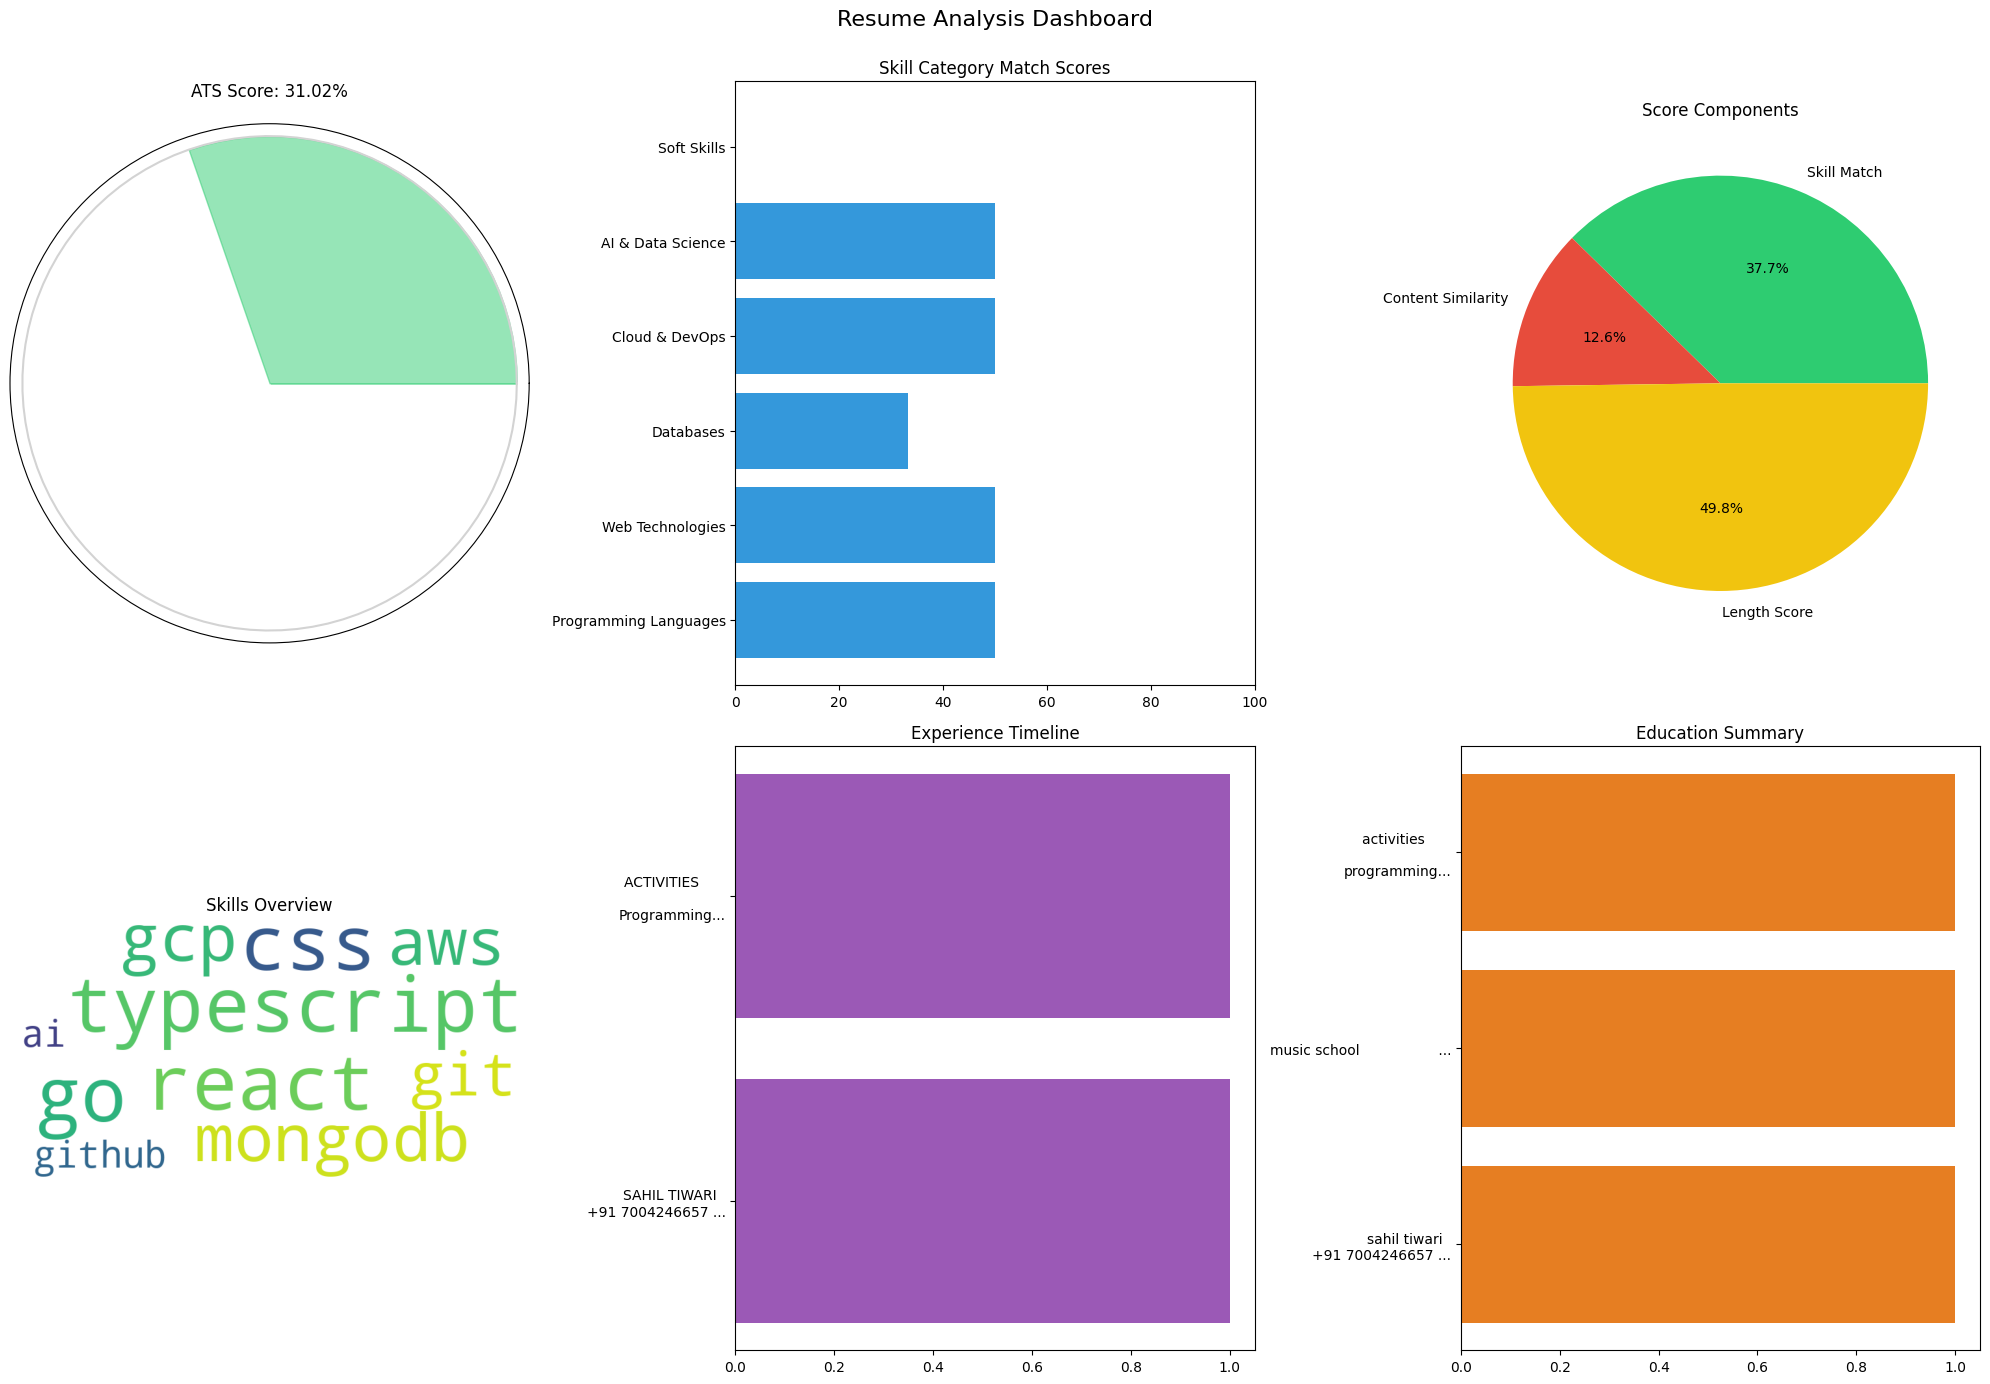

In [65]:
import PyPDF2
import pickle
import string
import nltk
import spacy
import re
import pandas as pd
import numpy as np
from datetime import datetime
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

# Download required NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

class AdvancedResumeAnalyzer:
    def __init__(self, model_path='resumeclassifier.pkl', tfidf_path='tfidf.pkl'):
        # Load models
        with open(model_path, 'rb') as file:
            self.rf = pickle.load(file)
        with open(tfidf_path, 'rb') as file:
            self.tfidf = pickle.load(file)

        # Initialize skill patterns
        self.skill_patterns = {
            'Programming Languages': [
                'python', 'java', 'javascript', 'c++', 'ruby', 'php', 'swift',
                'kotlin', 'go', 'rust', 'typescript', 'scala', 'r', 'matlab'
            ],
            'Web Technologies': [
                'html', 'css', 'react', 'angular', 'vue', 'node.js', 'django',
                'flask', 'spring', 'asp.net', 'jquery', 'bootstrap', 'sass'
            ],
            'Databases': [
                'sql', 'mysql', 'postgresql', 'mongodb', 'oracle', 'redis',
                'elasticsearch', 'cassandra', 'dynamodb', 'firebase'
            ],
            'Cloud & DevOps': [
                'aws', 'azure', 'gcp', 'docker', 'kubernetes', 'jenkins',
                'terraform', 'ansible', 'circleci', 'git', 'github', 'gitlab'
            ],
            'AI & Data Science': [
                'machine learning', 'deep learning', 'tensorflow', 'pytorch',
                'keras', 'scikit-learn', 'pandas', 'numpy', 'data analysis',
                'computer vision', 'nlp', 'ai'
            ],
            'Soft Skills': [
                'leadership', 'communication', 'teamwork', 'problem solving',
                'project management', 'agile', 'scrum', 'critical thinking'
            ]
        }

    def extract_text_from_pdf(self, pdf_path):
        """Extract text from PDF with metadata"""
        try:
            with open(pdf_path, 'rb') as file:
                reader = PyPDF2.PdfReader(file)
                metadata = reader.metadata
                text = ""
                for page in reader.pages:
                    text += page.extract_text()

                return {
                    'text': text.strip(),
                    'pages': len(reader.pages),
                    'metadata': metadata
                }
        except Exception as e:
            raise Exception(f"Error extracting PDF text: {str(e)}")

    def preprocess_text(self, text):
        """Enhanced text preprocessing with additional cleaning"""
        # Basic cleaning
        text = text.lower()
        text = re.sub(r'[^\w\s]', ' ', text)
        text = re.sub(r'\d+', ' ', text)
        text = ' '.join(text.split())

        # Remove stopwords
        stop_words = set(nltk.corpus.stopwords.words('english'))
        tokens = text.split()
        tokens = [token for token in tokens if token not in stop_words]

        # Lemmatization
        doc = nlp(' '.join(tokens))
        lemmatized = [token.lemma_ for token in doc]

        return ' '.join(lemmatized)

    def extract_contact_info(self, text):
        """Extract contact information from resume"""
        contact_info = {
            'email': None,
            'phone': None,
            'linkedin': None
        }

        # Email pattern
        email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
        emails = re.findall(email_pattern, text)
        if emails:
            contact_info['email'] = emails[0]

        # Phone pattern
        phone_pattern = r'\b(?:\+\d{1,3}[-.]?)?\(?\d{3}\)?[-.]?\d{3}[-.]?\d{4}\b'
        phones = re.findall(phone_pattern, text)
        if phones:
            contact_info['phone'] = phones[0]

        # LinkedIn pattern
        linkedin_pattern = r'linkedin\.com/in/[\w-]+'
        linkedin = re.findall(linkedin_pattern, text)
        if linkedin:
            contact_info['linkedin'] = linkedin[0]

        return contact_info

    def analyze_education(self, text):
        """Extract and analyze education information"""
        education_keywords = [
            'bachelor', 'master', 'phd', 'degree', 'university',
            'college', 'school', 'education', 'graduated'
        ]

        education_info = []
        sentences = nltk.sent_tokenize(text.lower())

        for sentence in sentences:
            if any(keyword in sentence for keyword in education_keywords):
                education_info.append(sentence.strip())

        return education_info

    def extract_experience(self, text):
        """Extract work experience information"""
        experience_keywords = [
            'experience', 'work', 'employment', 'job', 'career',
            'position', 'role', 'company', 'organization'
        ]

        experience_info = []
        sentences = nltk.sent_tokenize(text)

        for sentence in sentences:
            if any(keyword in sentence.lower() for keyword in experience_keywords):
                experience_info.append(sentence.strip())

        return experience_info

    def extract_skills(self, text):
        """Extract skills with categories"""
        text = text.lower()
        skills_found = {category: [] for category in self.skill_patterns.keys()}

        for category, patterns in self.skill_patterns.items():
            for skill in patterns:
                if skill in text:
                    skills_found[category].append(skill)

        return skills_found

    def calculate_detailed_ats_score(self, resume_text, job_description):
        """Calculate detailed ATS score with multiple components"""
        scores = {}

        # Skill match score
        resume_skills = self.extract_skills(resume_text)
        job_skills = self.extract_skills(job_description)

        skill_scores = {}
        for category in self.skill_patterns.keys():
            resume_category_skills = set(resume_skills[category])
            job_category_skills = set(job_skills[category])
            if job_category_skills:
                skill_scores[category] = len(resume_category_skills.intersection(job_category_skills)) / len(job_category_skills)
            else:
                skill_scores[category] = 1.0

        scores['skill_match'] = np.mean(list(skill_scores.values())) * 100

        # Content similarity score
        processed_resume = self.preprocess_text(resume_text)
        processed_job = self.preprocess_text(job_description)
        vectorizer = TfidfVectorizer()
        tfidf_matrix = vectorizer.fit_transform([processed_resume, processed_job])
        scores['content_similarity'] = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0] * 100

        # Length and formatting score
        word_count = len(resume_text.split())
        scores['length_score'] = min(100, (word_count / 500) * 100) if word_count < 500 else min(100, (1000 / word_count) * 100)

        # Calculate final weighted score
        weights = {
            'skill_match': 0.4,
            'content_similarity': 0.4,
            'length_score': 0.2
        }

        final_score = sum(scores[metric] * weights[metric] for metric in weights.keys())

        return {
            'final_score': round(final_score, 2),
            'component_scores': {k: round(v, 2) for k, v in scores.items()},
            'skill_category_scores': {k: round(v * 100, 2) for k, v in skill_scores.items()}
        }

    def create_visualizations(self, analysis_results):
      """Create comprehensive visualizations of the analysis"""
      # Use a basic style that's guaranteed to work
      plt.style.use('default')

      # Create figure with white background
      fig = plt.figure(figsize=(20, 15), facecolor='white')
      fig.suptitle('Resume Analysis Dashboard', fontsize=16, y=0.95)

      # Define color scheme
      colors = {
          'primary': '#2ecc71',    # green
          'secondary': '#3498db',  # blue
          'accent1': '#e74c3c',    # red
          'accent2': '#f1c40f',    # yellow
          'accent3': '#9b59b6',    # purple
          'accent4': '#e67e22'     # orange
      }

      # 1. ATS Score Gauge (top left)
      ax1 = plt.subplot(2, 3, 1, projection='polar')
      score = analysis_results['ats_scores']['final_score']
      theta = np.linspace(0, 2*np.pi, 100)
      r = np.ones_like(theta)
      ax1.plot(theta, r, color='lightgray')
      ax1.fill_between(theta, 0, r, where=theta <= 2*np.pi*score/100,
                      color=colors['primary'], alpha=0.5)
      ax1.set_title(f'ATS Score: {score}%', pad=20)
      ax1.set_xticks([])
      ax1.set_yticks([])

      # 2. Skill Category Scores (top middle)
      ax2 = plt.subplot(2, 3, 2)
      skill_scores = analysis_results['ats_scores']['skill_category_scores']
      categories = list(skill_scores.keys())
      scores = list(skill_scores.values())
      y_pos = np.arange(len(categories))
      ax2.barh(y_pos, scores, color=colors['secondary'])
      ax2.set_yticks(y_pos)
      ax2.set_yticklabels(categories)
      ax2.set_xlim(0, 100)
      ax2.set_title('Skill Category Match Scores')

      # 3. Component Scores Comparison (top right)
      ax3 = plt.subplot(2, 3, 3)
      component_scores = analysis_results['ats_scores']['component_scores']
      ax3.pie(component_scores.values(),
              labels=[k.replace('_', ' ').title() for k in component_scores.keys()],
              autopct='%1.1f%%',
              colors=[colors['primary'], colors['accent1'], colors['accent2']])
      ax3.set_title('Score Components')

      # 4. Skills Word Cloud (bottom left)
      ax4 = plt.subplot(2, 3, 4)
      all_skills = []
      for skills in analysis_results['skills'].values():
          all_skills.extend(skills)
      if all_skills:
          try:
              wordcloud = WordCloud(width=800, height=400,
                                  background_color='white').generate(' '.join(all_skills))
              ax4.imshow(wordcloud)
          except Exception:
              ax4.text(0.5, 0.5, 'Skills Overview\n' + '\n'.join(all_skills),
                      ha='center', va='center')
      ax4.axis('off')
      ax4.set_title('Skills Overview')

      # 5. Experience Timeline (bottom middle)
      ax5 = plt.subplot(2, 3, 5)
      experience = analysis_results['experience']
      if experience:
          y_pos = np.arange(len(experience))
          ax5.barh(y_pos, [1]*len(experience), color=colors['accent3'])
          ax5.set_yticks(y_pos)
          ax5.set_yticklabels([exp[:30] + '...' if len(exp) > 30 else exp
                              for exp in experience])
      ax5.set_title('Experience Timeline')

      # 6. Education Summary (bottom right)
      ax6 = plt.subplot(2, 3, 6)
      education = analysis_results['education']
      if education:
          y_pos = np.arange(len(education))
          ax6.barh(y_pos, [1]*len(education), color=colors['accent4'])
          ax6.set_yticks(y_pos)
          ax6.set_yticklabels([edu[:30] + '...' if len(edu) > 30 else edu
                              for edu in education])
      ax6.set_title('Education Summary')

      # Adjust layout to prevent overlap
      plt.tight_layout(rect=[0, 0.03, 1, 0.95])

      return plt

    def generate_report(self, analysis_results):
        """Generate a detailed text report of the analysis"""
        report = f"""
Resume Analysis Report
Generated on: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

1. ATS Score Analysis
--------------------
Overall Score: {analysis_results['ats_scores']['final_score']}%

Component Scores:
- Skill Match: {analysis_results['ats_scores']['component_scores']['skill_match']}%
- Content Similarity: {analysis_results['ats_scores']['component_scores']['content_similarity']}%
- Length and Formatting: {analysis_results['ats_scores']['component_scores']['length_score']}%

2. Skills Analysis
-----------------
"""
        for category, skills in analysis_results['skills'].items():
            if skills:
                report += f"\n{category}:\n- {', '.join(skills)}"

        report += f"""

3. Contact Information
---------------------
"""
        for key, value in analysis_results['contact_info'].items():
            if value:
                report += f"{key.capitalize()}: {value}\n"

        report += f"""

4. Education
-----------
"""
        for edu in analysis_results['education']:
            report += f"- {edu}\n"

        report += f"""

5. Experience
------------
"""
        for exp in analysis_results['experience']:
            report += f"- {exp}\n"

        return report

    def analyze_resume(self, pdf_path, job_description):
        """Main method to perform comprehensive resume analysis"""
        try:
            # Extract text and metadata
            pdf_info = self.extract_text_from_pdf(pdf_path)
            resume_text = pdf_info['text']

            # Perform various analyses
            contact_info = self.extract_contact_info(resume_text)
            education = self.analyze_education(resume_text)
            experience = self.extract_experience(resume_text)
            skills = self.extract_skills(resume_text)
            ats_scores = self.calculate_detailed_ats_score(resume_text, job_description)

            # Compile results
            analysis_results = {
                'contact_info': contact_info,
                'education': education,
                'experience': experience,
                'skills': skills,
                'ats_scores': ats_scores,
                'metadata': pdf_info['metadata'],
                'pages': pdf_info['pages']
            }

            # Generate visualizations and report
            visualizations = self.create_visualizations(analysis_results)
            report = self.generate_report(analysis_results)

            return {
                'analysis': analysis_results,
                'visualizations': visualizations,
                'report': report
            }

        except Exception as e:
            raise Exception(f"Error analyzing resume: {str(e)}")


def main():
    pdf_path = '/content/sahil tiwari_  resume(28-08).pdf'
    job_description = """
    Senior Full Stack Developer Position

    We are seeking an experienced Full Stack Developer to join our dynamic team.
    The ideal candidate will have:

    Technical Requirements:
    - Strong expertise in Python, JavaScript, and TypeScript
    - Experience with React.js and Node.js
    - Proficiency in SQL and NoSQL databases (PostgreSQL, MongoDB)
    - Experience with AWS cloud services and Docker containerization
    - Knowledge of CI/CD pipelines and DevOps practices

    Additional Skills:
    - Experience with machine learning and AI integration
    - Strong problem-solving abilities
    - Excellent communication and teamwork skills
    - Agile development experience
    - Project management capabilities

    Education:
    - Bachelor's degree in Computer Science or related field
    - Relevant certifications are a plus

    Experience:
    - Minimum 5 years of full-stack development experience
    - History of successful project delivery
    """

    try:
        # Initialize the analyzer
        analyzer = AdvancedResumeAnalyzer()

        # Perform analysis
        print("Analyzing resume...")
        results = analyzer.analyze_resume(pdf_path, job_description)

        # Display results
        print("\n=== Resume Analysis Results ===")

        # 1. Print ATS Scores
        print("\nATS Scores:")
        print(f"Final Score: {results['analysis']['ats_scores']['final_score']}%")
        print("\nComponent Scores:")
        for component, score in results['analysis']['ats_scores']['component_scores'].items():
            print(f"- {component.replace('_', ' ').title()}: {score}%")

        # 2. Print Skill Category Scores
        print("\nSkill Category Scores:")
        for category, score in results['analysis']['ats_scores']['skill_category_scores'].items():
            print(f"- {category}: {score}%")

        # 3. Print Contact Information
        print("\nContact Information:")
        for key, value in results['analysis']['contact_info'].items():
            if value:
                print(f"- {key.title()}: {value}")

        # 4. Print Skills Summary
        print("\nSkills Found:")
        for category, skills in results['analysis']['skills'].items():
            if skills:
                print(f"\n{category}:")
                print(", ".join(skills))

        # 5. Print Education Summary
        print("\nEducation:")
        for edu in results['analysis']['education']:
            print(f"- {edu}")

        # 6. Print Experience Summary
        print("\nExperience:")
        for exp in results['analysis']['experience']:
            print(f"- {exp}")

        # 7. Save visualizations
        print("\nSaving visualizations...")
        results['visualizations'].savefig('resume_analysis.png',
                                        bbox_inches='tight',
                                        dpi=300)
        print("Visualizations saved as 'resume_analysis.png'")

        # 8. Save detailed report
        print("\nSaving detailed report...")
        with open('resume_analysis_report.txt', 'w') as f:
            f.write(results['report'])
        print("Detailed report saved as 'resume_analysis_report.txt'")

        # 9. Display recommendations
        print("\nRecommendations:")
        final_score = results['analysis']['ats_scores']['final_score']
        if final_score >= 80:
            print("✅ Strong match for the position!")
            print("- Consider highlighting specific project achievements")
            print("- Prepare detailed examples of past experiences")
        elif final_score >= 60:
            print("🟡 Good potential match with some gaps")
            print("- Focus on strengthening missing skills")
            print("- Add more specific examples of required technologies")
        else:
            print("❌ Significant skill gaps identified")
            print("- Consider additional training in required technologies")
            print("- Revise resume to better align with job requirements")

        # 10. Display missing skills
        required_skills = set()
        for skills in analyzer.extract_skills(job_description).values():
            required_skills.update(skills)

        current_skills = set()
        for skills in results['analysis']['skills'].values():
            current_skills.update(skills)

        missing_skills = required_skills - current_skills
        if missing_skills:
            print("\nMissing Skills:")
            print(", ".join(missing_skills))

    except Exception as e:
        print(f"Error during analysis: {str(e)}")
        raise

if __name__ == "__main__":
    main()